<h1>Oulier Detection</h1>
<h3>What is an Outlier?</h3>
<p>An outlier is any data point which differs greatly from the rest of the observations in a dataset. Let’s see some real life examples to understand outlier detection:</p>
<ul>
    <li>When one student averages over 90% while the rest of the class is at 70% – a clear outlier</li>
    <li>While analyzing a certain customer’s purchase patterns, it turns out there’s suddenly an entry for a very high value. While most of his/her transactions fall below Rs. 10,000, this entry is for Rs. 1,00,000. It could be an electronic item purchase – whatever the reason, it’s an outlier in the overall data.</li>
</ul>


<h3>How is an outlier introduced to the dataset?</h3>
<p>The Data Science project starts with collection of data and that’s when outliers first introduced to the population. Though, you will not know about the outliers at all in the collection phase. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.</p>

<p>To understand better let us take following small dataset of cricket scores.</p>
<table>
    <tr>
        <th>Player</th>
        <th>Score</th>
    </tr>
     <tr>
        <th>Sachin</th>
        <th>540</th>
    </tr>
     <tr>
        <th>Dravid</th>
        <th>460</th>
    </tr>
     <tr>
        <th>Sehwag</th>
        <th>450</th>
    </tr>
     <tr>
        <th>Ganguly</th>
        <th>408</th>
    </tr>
     <tr>
        <th>Virat</th>
        <th>520</th>
    </tr>
     <tr>
        <th>Laxman</th>
        <th>40</th>
    </tr>
     <tr>
        <th>Gambhir</th>
        <th>432</th>
    </tr>
</table>



<p>As you can see from the above collected data that all other players scored 400+ except Laxman who scored 40. This figure can be just a typing mistake or it is showing the variance in your data and indicating that Laxman is performing very bad so, needs improvements.</p>

<p>Now that we know outliers can either be a mistake or just variance, how would you decide if they are important or not. Well, it is pretty simple if they are the result of a mistake, then we can ignore them, but if it is just a variance in the data we would need think a bit further. </p>

<h3>Finding Outliers</h3>
<p>For this implementation we will use <a href="https://www.kaggle.com/c/boston-housing/data">Boston House Price</a> Dataset.</p>

<strong>importing useful modules</strong>

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats
import numpy as np

<strong>visualizing the dataset</strong>

In [12]:
boston_df = pd.read_csv("BostonHousePricingDataset/train.csv")
boston_df.drop(columns=["medv"], inplace = True)      #dropping the target column as the anomaly detection will be conducted on features
boston_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


<p>There are two types of analysis we will follow to find the outliers- Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis)</p>

<h2>Discover outliers with visualization tools</h2>
<h3>Box plot</h3>
<p>In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.</p>

<p>Above definition suggests, that if there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.</p>

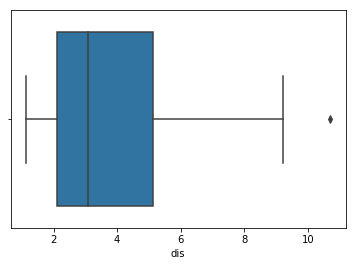

In [104]:
sns.boxplot(x=boston_df['dis'])

<p>Above plot shows one point greater than 10. this is an outlier as it is not included in the box of other observation i.e no where near the quartiles. </p>

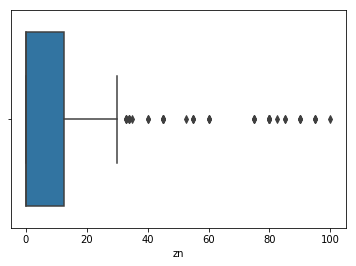

In [105]:
sns.boxplot(x=boston_df['zn'])

<p>This plot shows quite a few values not included in the box. some values are far away white others are close to whiskers.</p>

<p>Here we analysed Uni-variate outlier i.e. we used DIS column and zn column indivisually to check the outlier. But we can do multivariate outlier analysis too. </p>

<h3>Scatter Plot</h3>
<p>A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.</p>
<p>As the definition suggests, the scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables from our housing dataset.</p>

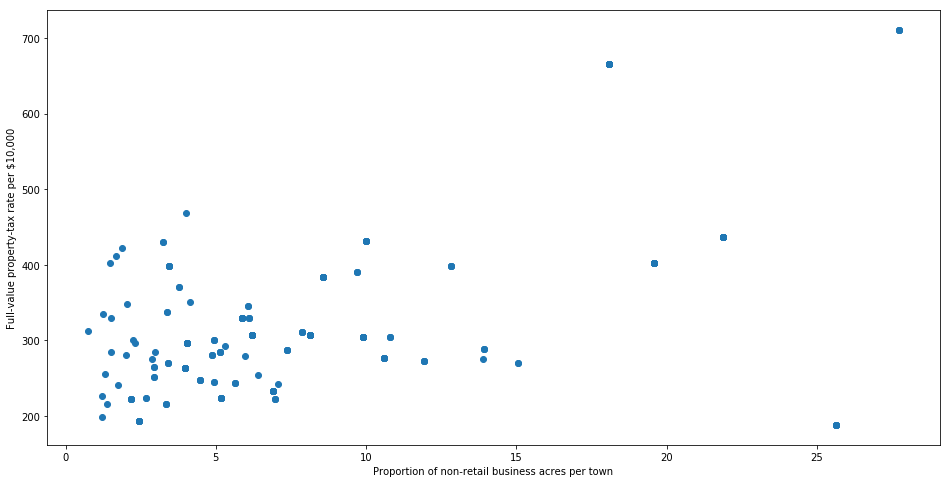

In [106]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['indus'], boston_df['tax'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

<p>Looking at the plot above, we can say that most of data points are lying bottom left side but there are points which are far from the population like top right corner.</p>

<h2>Discover outliers with mathematical function</h2>
<h3>Z-Score</h3>

<p>
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.</p>
</p>The intuition behind Z-score is to describe any data point by finding its relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.</p>
<p>while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.</p>

<p>We will use Z-score function defined in scipy library to detect the outliers.</p>

In [34]:
z = np.abs(stats.zscore(boston_df))
print(z)

[[1.69301403 0.45687496 0.32290583 ... 1.46517068 0.43298984 1.06777158]
 [1.68624067 0.45401577 0.47212294 ... 0.30161579 0.43298984 0.47829937]
 [1.67269396 0.45332651 0.47212294 ... 0.11726397 0.40673324 1.35683968]
 ...
 [1.70721164 0.45156931 0.47212294 ... 1.18773447 0.43298984 0.48680137]
 [1.713985   0.4494593  0.47212294 ... 1.18773447 0.43298984 0.97424954]
 [1.72753171 0.4512778  0.47212294 ... 1.18773447 0.43298984 0.65684143]]


<p>To have a better look at the outliers we will use threshold.</p>

In [35]:
#show only those values having z > threshold
threshold = 3
print(np.where(z > threshold))

(array([ 35,  36,  37,  43,  44,  69,  96,  97, 104, 105, 108, 110, 110,
       138, 139, 140, 141, 142, 145, 146, 149, 150, 151, 154, 161, 163,
       176, 184, 185, 188, 189, 189, 190, 192, 194, 195, 230, 231, 233,
       234, 235, 236, 240, 242, 244, 246, 247, 248, 248, 261, 267, 268,
       268, 268, 269, 270, 271, 271, 272, 273, 274, 275, 275, 276, 277,
       278, 279, 282, 289, 295, 296, 305], dtype=int64), array([ 2,  2,  2,  2,  2, 12, 13,  4,  4, 12,  4,  4,  6,  2,  2,  2,  2,
        2,  4,  4,  4,  4,  4,  6,  4,  4,  6,  4,  4,  4,  2,  4,  2,  2,
        2,  2,  2,  2,  8,  4,  4,  4,  6,  6,  4,  4, 13,  6, 13,  1,  1,
        1, 12, 13, 12,  1,  1, 12, 12, 12, 12,  1, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12], dtype=int64))


<p>The first array contains the list of row numbers and second array respective column numbers
To access a particular record we can use simple python code as follows:</p>

In [36]:
print(z[35][2])

3.5030209229046254


<p>z[35][2] means that 35th record on 2nd column is having z value of 3.50.</p>
<p>And if we go by conventions then this value is an outlier and must be dealt with properly.</p>

<h3>IQR (interquartile range)</h3>

<p>Another robust method for labeling outliers is the IQR (interquartile range) method of outlier detection developed by John Tukey, the pioneer of exploratory data analysis. Box plot use the IQR method to display data and outliers.</p>

<p>A box-and-whisker plot uses quartiles (points that divide the data into four groups of equal size) to plot the shape of the data. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles. The line inside the box represents the 2nd quartile, which is the median.</p>

<p>The interquartile range is the range between the first and the third quartiles (the edges of the box). Tukey considered any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside” or “far out”. In a classic box-and-whisker plot, the ‘whiskers’ extend up to the last data point that is not “outside”.</p>

<p>IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.</p>

<p>Let’s find out how we can find the list of outliers with IQR as we did using Z-score calculation. First we will calculate IQR</p>



In [79]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID         254.00000
crim         3.59926
zn          12.50000
indus       12.97000
chas         0.00000
nox          0.17800
rm           0.71100
age         48.40000
dis          2.99430
rad         20.00000
tax        387.00000
ptratio      2.80000
black       19.51000
lstat        9.24000
dtype: float64


<p>These are the IQR for each column.</p>
<p>Now we will catch outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.</p>

In [81]:
print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))

        ID   crim     zn  indus   chas    nox     rm    age    dis    rad  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: Could not compare [None] with block values

<h2>Dealing with Outliers</h2>
<p><strong>1. using Z-Score</strong></p>

In [86]:
boston_df_edited_z = boston_df[(z < 3).all(axis=1)]
#keeping only those values in boston_df_edited where z score is lower than 3.

In [87]:
boston_df.shape

(333, 14)

In [88]:
boston_df_edited_z.shape

(268, 14)

<p>As we can see that by this way we removed 65 records which were outliers.</p>

<p><strong>2. Using IQR</strong></p>

In [82]:
#keeping only values
boston_df_edited_IQR = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [83]:
boston_df_edited_IQR.shape

(186, 14)

<p>This method removed 147 records</p>


<p><strong>But this mehod of data removal should not be followed always.</strong></p>
<p>Before removing any value we should carefully examine whether it is a genune oulier or a case of variance</p>
<p><strong>Note: </strong>bad data, wrong calculation, these can be identified as Outliers and should be dropped but at the same time you might want to correct them too, as they change the level of data i.e. mean which cause issues when you model your data. For ex- 5 people get salary of 10K, 20K, 30K, 40K and 50K and suddenly one of the person start getting salary of 100K. Consider this situation as, you are the employer, the new salary update might be seen as biased and you might need to increase other employee’s salary too, to keep the balance. So, there can be multiple reasons you want to understand and correct the outliers.</p>

<h1> Alternate methods for outlier detection using PyOD library </h1>
<p>PyOD is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single well-documented API.</p>

<p>For this method we will use <a href="https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/?utm_source=outlierdetectionpyod&utm_medium=blog">Big Mart Sales Problem</a> dataset.
    
<p>First read the data into dataframe df.</p>

In [89]:
df = pd.read_csv("BigMartSales3/Train.csv")

<p>Let us see the structure of data</p>

In [91]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<p>Let’s plot Item MRP vs Item Outlet Sales to understand the data</p>

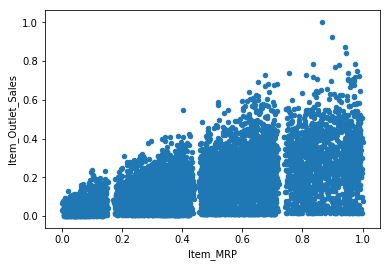

In [107]:
df.plot.scatter('Item_MRP','Item_Outlet_Sales')

<p>In order to fit the data for explainable visualization we will reduce the scale of the data</p>

In [93]:
#reduicng the scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Item_MRP','Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_MRP','Item_Outlet_Sales']])
df[['Item_MRP','Item_Outlet_Sales']].head()

,Item_MRP,Item_Outlet_Sales
0,0.927507,0.283587
1,0.072068,0.031419
2,0.468288,0.158115
3,0.640093,0.053555
4,0.095805,0.073651


In [94]:
#Store these values in the NumPy array for using in our model.
X1 = df['Item_MRP'].values.reshape(-1,1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

<p>There are multiple models available in PyOD. refer <a href="https://pyod.readthedocs.io/en/latest/">PyOD documentation</a> for all the models</p>
<p>One such model is <i>Angle-Based Outlier Detection (ABOD):</i> It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score.</p>

<p>Now we will see how this model is applied on the data</p>

In [95]:
from pyod.models.abod import ABOD
outliers_fraction = 0.05
model = ABOD(contamination=outliers_fraction)
model.fit(X)

C:\Users\ajeet\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ABOD(contamination=0.05, method='fast', n_neighbors=5)

In [97]:
#Predicting the outliers 
y_pred = model.predict(X)

<p>Below lines of code will calculate number of outliers and inliners.</p>

In [99]:
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

print('OUTLIERS : ',n_outliers,' and INLIERS : ',n_inliers)

OUTLIERS :  447  and INLIERS :  8076


<p>For better visualization let us plot the result</p>

C:\Users\ajeet\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


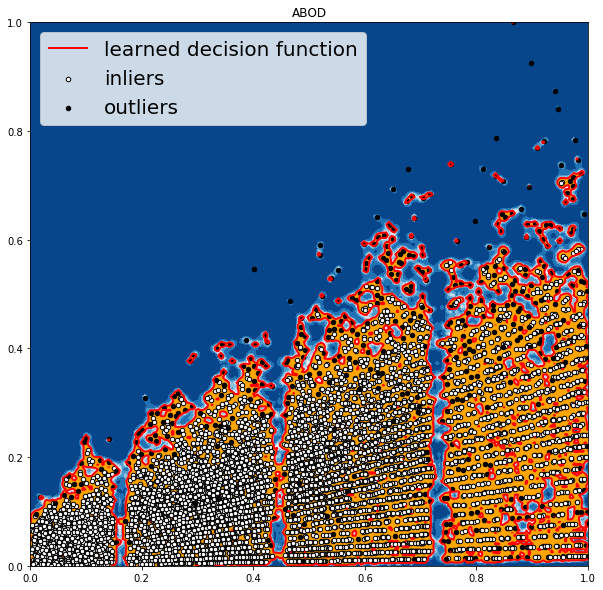

In [111]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

# predict raw anomaly score
scores_pred = model.decision_function(X) * -1
        
plt.figure(figsize=(10, 10))

# copy of dataframe
dfx = df
dfx['outlier'] = y_pred.tolist()

# IX1 - inlier feature 1,  IX2 - inlier feature 2
IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)

# OX1 - outlier feature 1, OX2 - outlier feature 2
OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)


# threshold value to consider a datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

# decision function calculates the raw anomaly score for every point
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)

# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')

c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')

plt.axis('tight')  

# loc=2 is used for the top left corner 
plt.legend(
    [a.collections[0], b,c],
    ['learned decision function', 'inliers','outliers'],
    prop=matplotlib.font_manager.FontProperties(size=20),
    loc=2)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title("ABOD")
plt.show()

<p><strong>Now let us implement k-Nearest Neighbors Detector </strong></p>
<p>In KNN for any data point, the distance to its kth nearest neighbor could be viewed as the outlying score</p>
<p>It is implemented same way as ABOD. Below is its implementation.</p>

In [112]:
from pyod.models.knn import KNN
outliers_fraction = 0.05
model = KNN(contamination=outliers_fraction)
model.fit(X)

C:\Users\ajeet\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [113]:
#Predicting the outliers 
y_pred = model.predict(X)

In [114]:
#calculating number of outliers and inliners
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

print('OUTLIERS : ',n_outliers,' and INLIERS : ',n_inliers)

OUTLIERS :  311  and INLIERS :  8212


C:\Users\ajeet\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


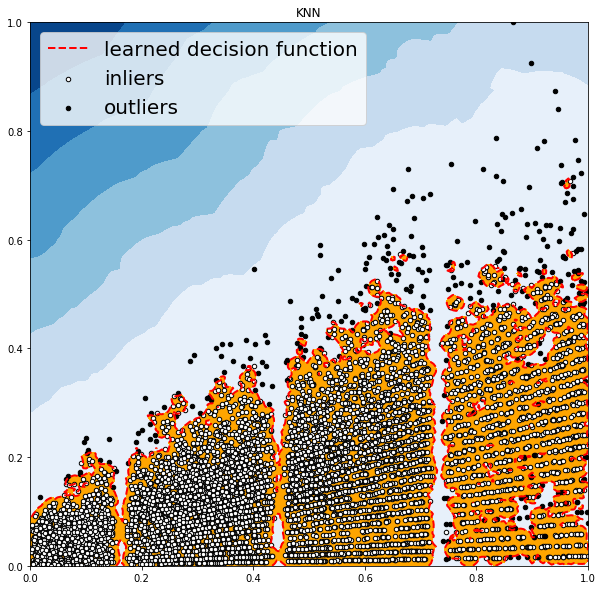

In [115]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

# predict raw anomaly score
scores_pred = model.decision_function(X) * -1
        
plt.figure(figsize=(10, 10))

# copy of dataframe
dfx = df
dfx['outlier'] = y_pred.tolist()

# IX1 - inlier feature 1,  IX2 - inlier feature 2
IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)

# OX1 - outlier feature 1, OX2 - outlier feature 2
OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)


# threshold value to consider a datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

# decision function calculates the raw anomaly score for every point
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)

# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')

c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')

plt.axis('tight')  

# loc=2 is used for the top left corner 
plt.legend(
    [a.collections[0], b,c],
    ['learned decision function', 'inliers','outliers'],
    prop=matplotlib.font_manager.FontProperties(size=20),
    loc=2)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title("KNN")
plt.show()

<p>Similiarly other models can also be applied for determining outliers </p>

<h2>References:</h2>
<li><a href="https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/?utm_medium=linkedinHA&utm_source=linkedinHA">https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/?utm_medium=linkedinHA&utm_source=linkedinHA</a></li>
<li><a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba</a></li>
<li><a href="http://colingorrie.github.io/outlier-detection.html">http://colingorrie.github.io/outlier-detection.html</a></li>